# Challenge

This is a three steps challenge. 

* Generate and plot a dataset with two non-overlaping swiss rolls on $\mathbb{R}^3$. 
* Try to resolve the two generated swiss rolls through a k-means algorithm. 
* Resolve the problem with a spectral clustering approach. 



## Data Generation

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time as time
import numpy as np
import pylab as pl
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering,SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets.samples_generator import make_swiss_roll


In [3]:
# Generate data (swiss roll dataset)
n_samples = 1000
noise = 0.05
X1, _ = make_swiss_roll(n_samples, noise)
X2, _ = make_swiss_roll(n_samples, noise)
# Shrink second dimension
X1[:, 1] *= .1
X2[:, 1] *= .1

In [4]:
import mpl_toolkits.mplot3d.axes3d as p3
import pylab as pl
def myplot(X, col='blue'):
    fig = pl.figure()
    ax = p3.Axes3D(fig)
    ax.view_init(7, -80)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               s=10, c=col, marker='o')  
    return (ax)


In [5]:
 %matplotlib notebook

<IPython.core.display.Javascript object>


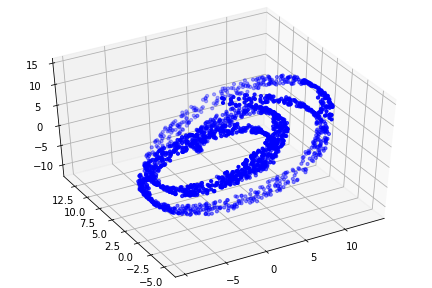

In [6]:
def rotation(theta, R = np.zeros((3,3))):
    cx,cy,cz = np.cos(theta)
    sx,sy,sz = np.sin(theta)
    R.flat = (cx*cz - sx*cy*sz, cx*sz + sx*cy*cz, sx*sy,
        -sx*cz - cx*cy*sz, -sx*sz + cx*cy*cz,
        cx*sy, sy*sz, -sy*cz, cy)
    return R

R = rotation((0,np.pi/4,np.pi/4))
X= np.concatenate((X1,2+X2.dot(R)))
myplot(X)

## kmeans clustering

Let's try to resolve the swiss roll problem through a kmeans clustering approach. 

In [7]:

kmeans = KMeans( n_clusters=2)
kmeans.fit(X)
y_pred_kmeans = kmeans.labels_


<IPython.core.display.Javascript object>


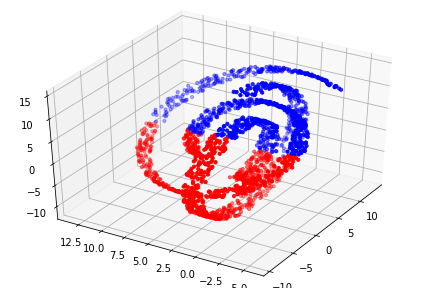

In [8]:
colors = [x for x in 'rb']
myplot(X,col= [colors[x] for x in y_pred_kmeans])

## Spectral Clustering approach

In [11]:
spectral_clustering = SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors")
spectral_clustering.fit(X)
y_pred_spectral = spectral_clustering.labels_

/home/acmankit/anaconda3/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>


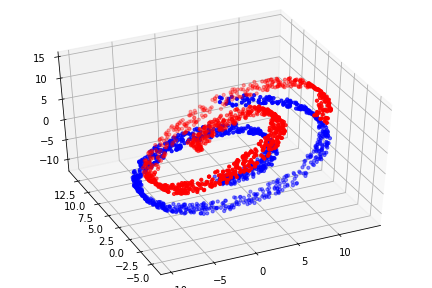

In [13]:
colors = [x for x in 'rb']
myplot(X,col= [colors[x] for x in y_pred_spectral])